# Experiment 1: All Features

## Imports

In [1]:
#! /usr/bin/env python3

%load_ext autoreload
# %autoreload 0
%autoreload

from pathlib import Path
import pyaarapsi.vpr.config as config
data_dir = '/home/owen/Documents/git_repos/tmp/data'
ap_dir = '/home/owen/Documents/git_repos/tmp/aarapsiproject'
config.make_config(data_path=Path(data_dir), workspace_path_1=Path(ap_dir))

import copy
import warnings
from itertools import product

import numpy as np
import pandas as pd
import matplotlib
import scienceplots # for ieee style
import seaborn as sns
from matplotlib import pyplot as plt, ticker
from matplotlib.lines import Line2D

from pyaarapsi.nn.visualize import adj_make_split_axes_y_linlog

from pyaarapsi.nn.params import DFExperiment1, Experiment1, DFGeneral, General, DFNNTrain, \
    DFNNTest, NNGeneral
from experiment_functions import make_load_experiment_1

plt.style.use('ieee')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

EXPERIMENT1     = Experiment1()
DF_EXPERIMENT1  = DFExperiment1()
DF_GENERAL      = DFGeneral()
GENERAL         = General()
DF_NN_TRAIN     = DFNNTrain()
DF_NN_TEST      = DFNNTest()
NN_GENERAL      = NNGeneral()

GENERAL.VPR_DP.cuda = False

/home/owen/miniforge3/envs/ros1env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Error code: 
Exception Caught.
	Details: <class 'ModuleNotFoundError'> No module named 'aarapsi_robot_pack'
	File /home/owen/miniforge3/envs/ros1env/lib/python3.11/site-packages/pyaarapsi/core/ros_tools.py [Line 28]
	Trace: <module> [28] >> <module> [5]


# Results

## Data

In [2]:
%matplotlib inline
_df_features = {}

GENERAL.VPR_DP.printer = None if GENERAL.VPRDP_VERBOSE else lambda *args, **kwargs: None
GENERAL.VPR_DP.use_tqdm = GENERAL.VPRDP_VERBOSE

for VPR_DESCRIPTOR in DF_GENERAL.DESCRIPTOR_TYPES:

    data = make_load_experiment_1(df_nn_train=DF_NN_TRAIN, df_nn_test=DF_NN_TEST,
                                  vpr_descriptor=VPR_DESCRIPTOR, general=GENERAL, df_general=DF_GENERAL,
                                  df_exp1=DF_EXPERIMENT1, exp1=EXPERIMENT1, nn_general=NN_GENERAL)

    data['vprfeaturetype'] = VPR_DESCRIPTOR.name
    data['vprfeaturename'] = VPR_DESCRIPTOR.get_descriptor_name()
    data['svmfactor1type'] = DF_NN_TRAIN.VPR.SVM_FACTORS[VPR_DESCRIPTOR.name][0]
    data['svmfactor2type'] = DF_NN_TRAIN.VPR.SVM_FACTORS[VPR_DESCRIPTOR.name][1]

    _df_features[VPR_DESCRIPTOR.name] = copy.deepcopy(data)
    del data

del VPR_DESCRIPTOR

df_features = pd.concat([_df_features[i] for i in _df_features.keys()])

Data loaded (exp1_data_20250319).
Data loaded (exp1_data_20250323).
Data loaded (exp1_data_20250324).


## Plots

/tmp/ipykernel_12784/3492507145.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_m1[2].set_xticklabels(['Office\nNormal','Office\nAdverse','Campus\nNormal','Campus\nAdverse']);#,(rotation=45, ha='right')


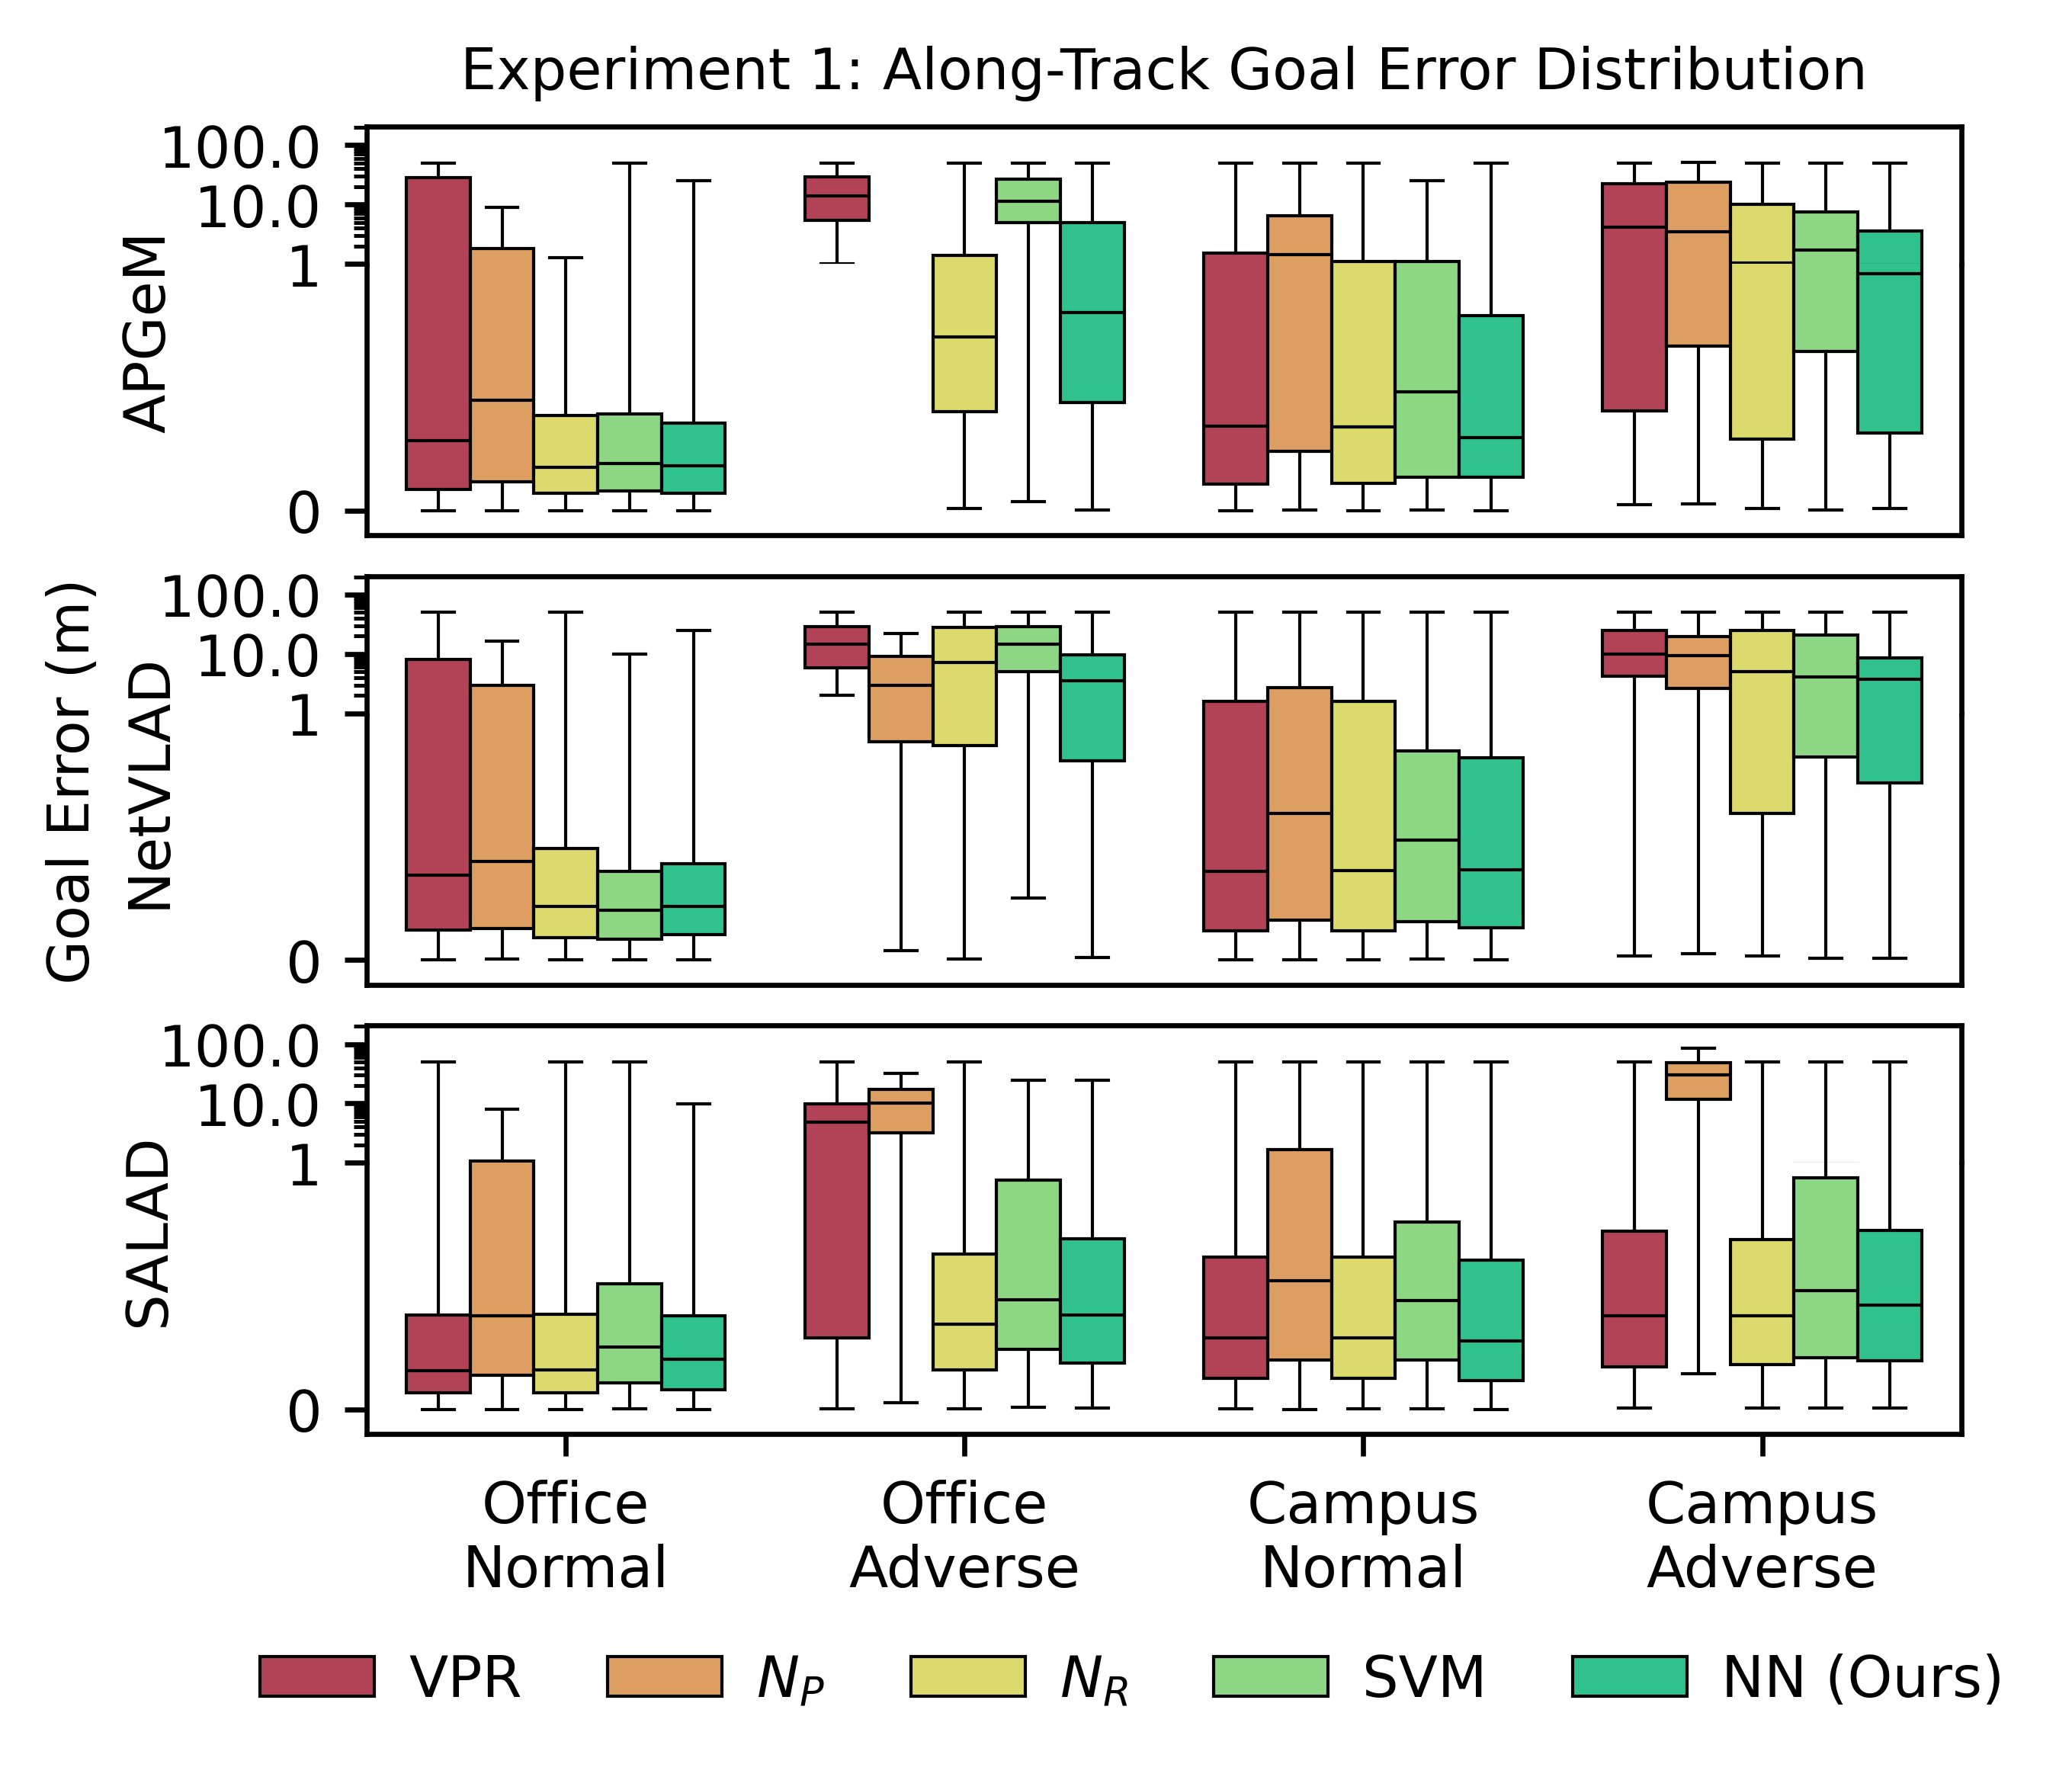

In [3]:
# For some reason, this plot breaks in Seaborn v0.13.0
# pip install seaborn==0.12.2; pgrep python | xargs kill -9
# then rerun script.

if True: # for code folding :-)

    _s = 4.5/4.0

    fig_m1, axes_m1 = plt.subplots(3,1,figsize=(4*_s,_s*1.1*3), sharex=True)

    axes_m1_plotter = lambda ft_type, ax: sns.boxplot(
        data=df_features[(df_features['vprfeaturetype']==ft_type) & (df_features.goal_found==True)], 
        y='abs_overshoot',x='set',hue='filter',ax=ax, palette=GENERAL.PALETTE, whis=1000,
        hue_order=GENERAL.HUE_ORDER, order=GENERAL.SET_ORDER, linewidth=0.5, width=0.8,
        flierprops=dict(alpha=.05, marker='.', markersize=4, markeredgecolor='none', markerfacecolor='k'),
        capprops=dict(color='k'),
        boxprops=dict(edgecolor='k'), whiskerprops=dict(color='k'), medianprops=dict(color='k'))

    logscale = True
    formatter = ticker.FormatStrFormatter("%0.1f")
    if logscale:
        axes_m1log0 = adj_make_split_axes_y_linlog(axes=axes_m1[0], lims=[-0.1, 1, 205], 
                        plotter=lambda ax: axes_m1_plotter('APGEM', ax), size=0.3)
        axes_m1log1 = adj_make_split_axes_y_linlog(axes=axes_m1[1], lims=[-0.1, 1, 205], 
                        plotter=lambda ax: axes_m1_plotter('NETVLAD', ax), size=0.3)
        axes_m1log2 = adj_make_split_axes_y_linlog(axes=axes_m1[2], lims=[-0.1, 1, 205], 
                        plotter=lambda ax: axes_m1_plotter('SALAD', ax), size=0.3)
        axes_m1log0.yaxis.set_major_formatter(formatter)
        axes_m1log1.yaxis.set_major_formatter(formatter)
        axes_m1log2.yaxis.set_major_formatter(formatter)
        axes_m1log0.tick_params(axis='both', which='both', labelsize=9)
        axes_m1log1.tick_params(axis='both', which='both', labelsize=9)
        axes_m1log2.tick_params(axis='both', which='both', labelsize=9)

    else:
        axes_m1_plotter('APGEM', axes_m1[0])
        axes_m1[0].set_ylabel('')
        axes_m1[0].set_xlabel('')
        axes_m1[0].get_legend().set_visible(False)

        axes_m1_plotter('NETVLAD', axes_m1[1])
        axes_m1[1].set_ylabel('')
        axes_m1[1].set_xlabel('')
        axes_m1[1].get_legend().set_visible(False)

        axes_m1_plotter('SALAD', axes_m1[2])
        axes_m1[2].set_ylabel('')
        axes_m1[2].set_xlabel('')
        axes_m1[2].get_legend().set_visible(False)

        axes_m1[0].yaxis.set_major_formatter(formatter)
        axes_m1[1].yaxis.set_major_formatter(formatter)
        axes_m1[2].yaxis.set_major_formatter(formatter)

    axes_m1[0].tick_params(bottom=False)
    axes_m1[1].tick_params(bottom=False)

    small_frame0 = fig_m1.add_subplot(311, frameon=False)
    small_frame1 = fig_m1.add_subplot(312, frameon=False)
    small_frame2 = fig_m1.add_subplot(313, frameon=False)

    small_frame0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    small_frame1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    small_frame2.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    small_frame0.set_ylabel('APGeM',      fontsize=9, labelpad=5)
    small_frame1.set_ylabel('NetVLAD',  fontsize=9, labelpad=5)
    small_frame2.set_ylabel('SALAD',    fontsize=9, labelpad=5)

    big_frame = fig_m1.add_subplot(111, frameon=False)
    big_frame.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    big_frame.set_ylabel('Goal Error (m)',  labelpad=22, fontsize=9)
    big_frame.set_title('Experiment 1: Along-Track Goal Error Distribution', fontsize=9)

    lgnd = axes_m1[2].legend(loc='lower center', frameon=False, ncol=5, bbox_to_anchor=(0.48,-1.2),
                             fontsize=9, labelspacing=0, columnspacing=1.5, handletextpad=0.6)

    axes_m1[0].tick_params(axis='both', which='both', labelsize=9)
    axes_m1[1].tick_params(axis='both', which='both', labelsize=9)
    axes_m1[2].tick_params(axis='both', which='both', labelsize=9)

    axes_m1[2].set_xticklabels(['Office\nNormal','Office\nAdverse','Campus\nNormal','Campus\nAdverse']);#,(rotation=45, ha='right')

    fig_m1.subplots_adjust(hspace=0.1)

    fig_m1.canvas.draw()


    path = GENERAL.DIR_MEDIA + '/exp1_new_extended_key_results_vertical' #relative to file directory
    fig_m1.savefig(path+'.pdf', format='pdf', bbox_extra_artists=(lgnd,), dpi=300, pad_inches=0, bbox_inches='tight')
    fig_m1.savefig(path+'.png', format='png', bbox_extra_artists=(lgnd,), dpi=300, pad_inches=0, bbox_inches='tight')

    # for some Strange reason, on seaborn 0.13.2 these boxplots don't draw correctly in a logscale :-(

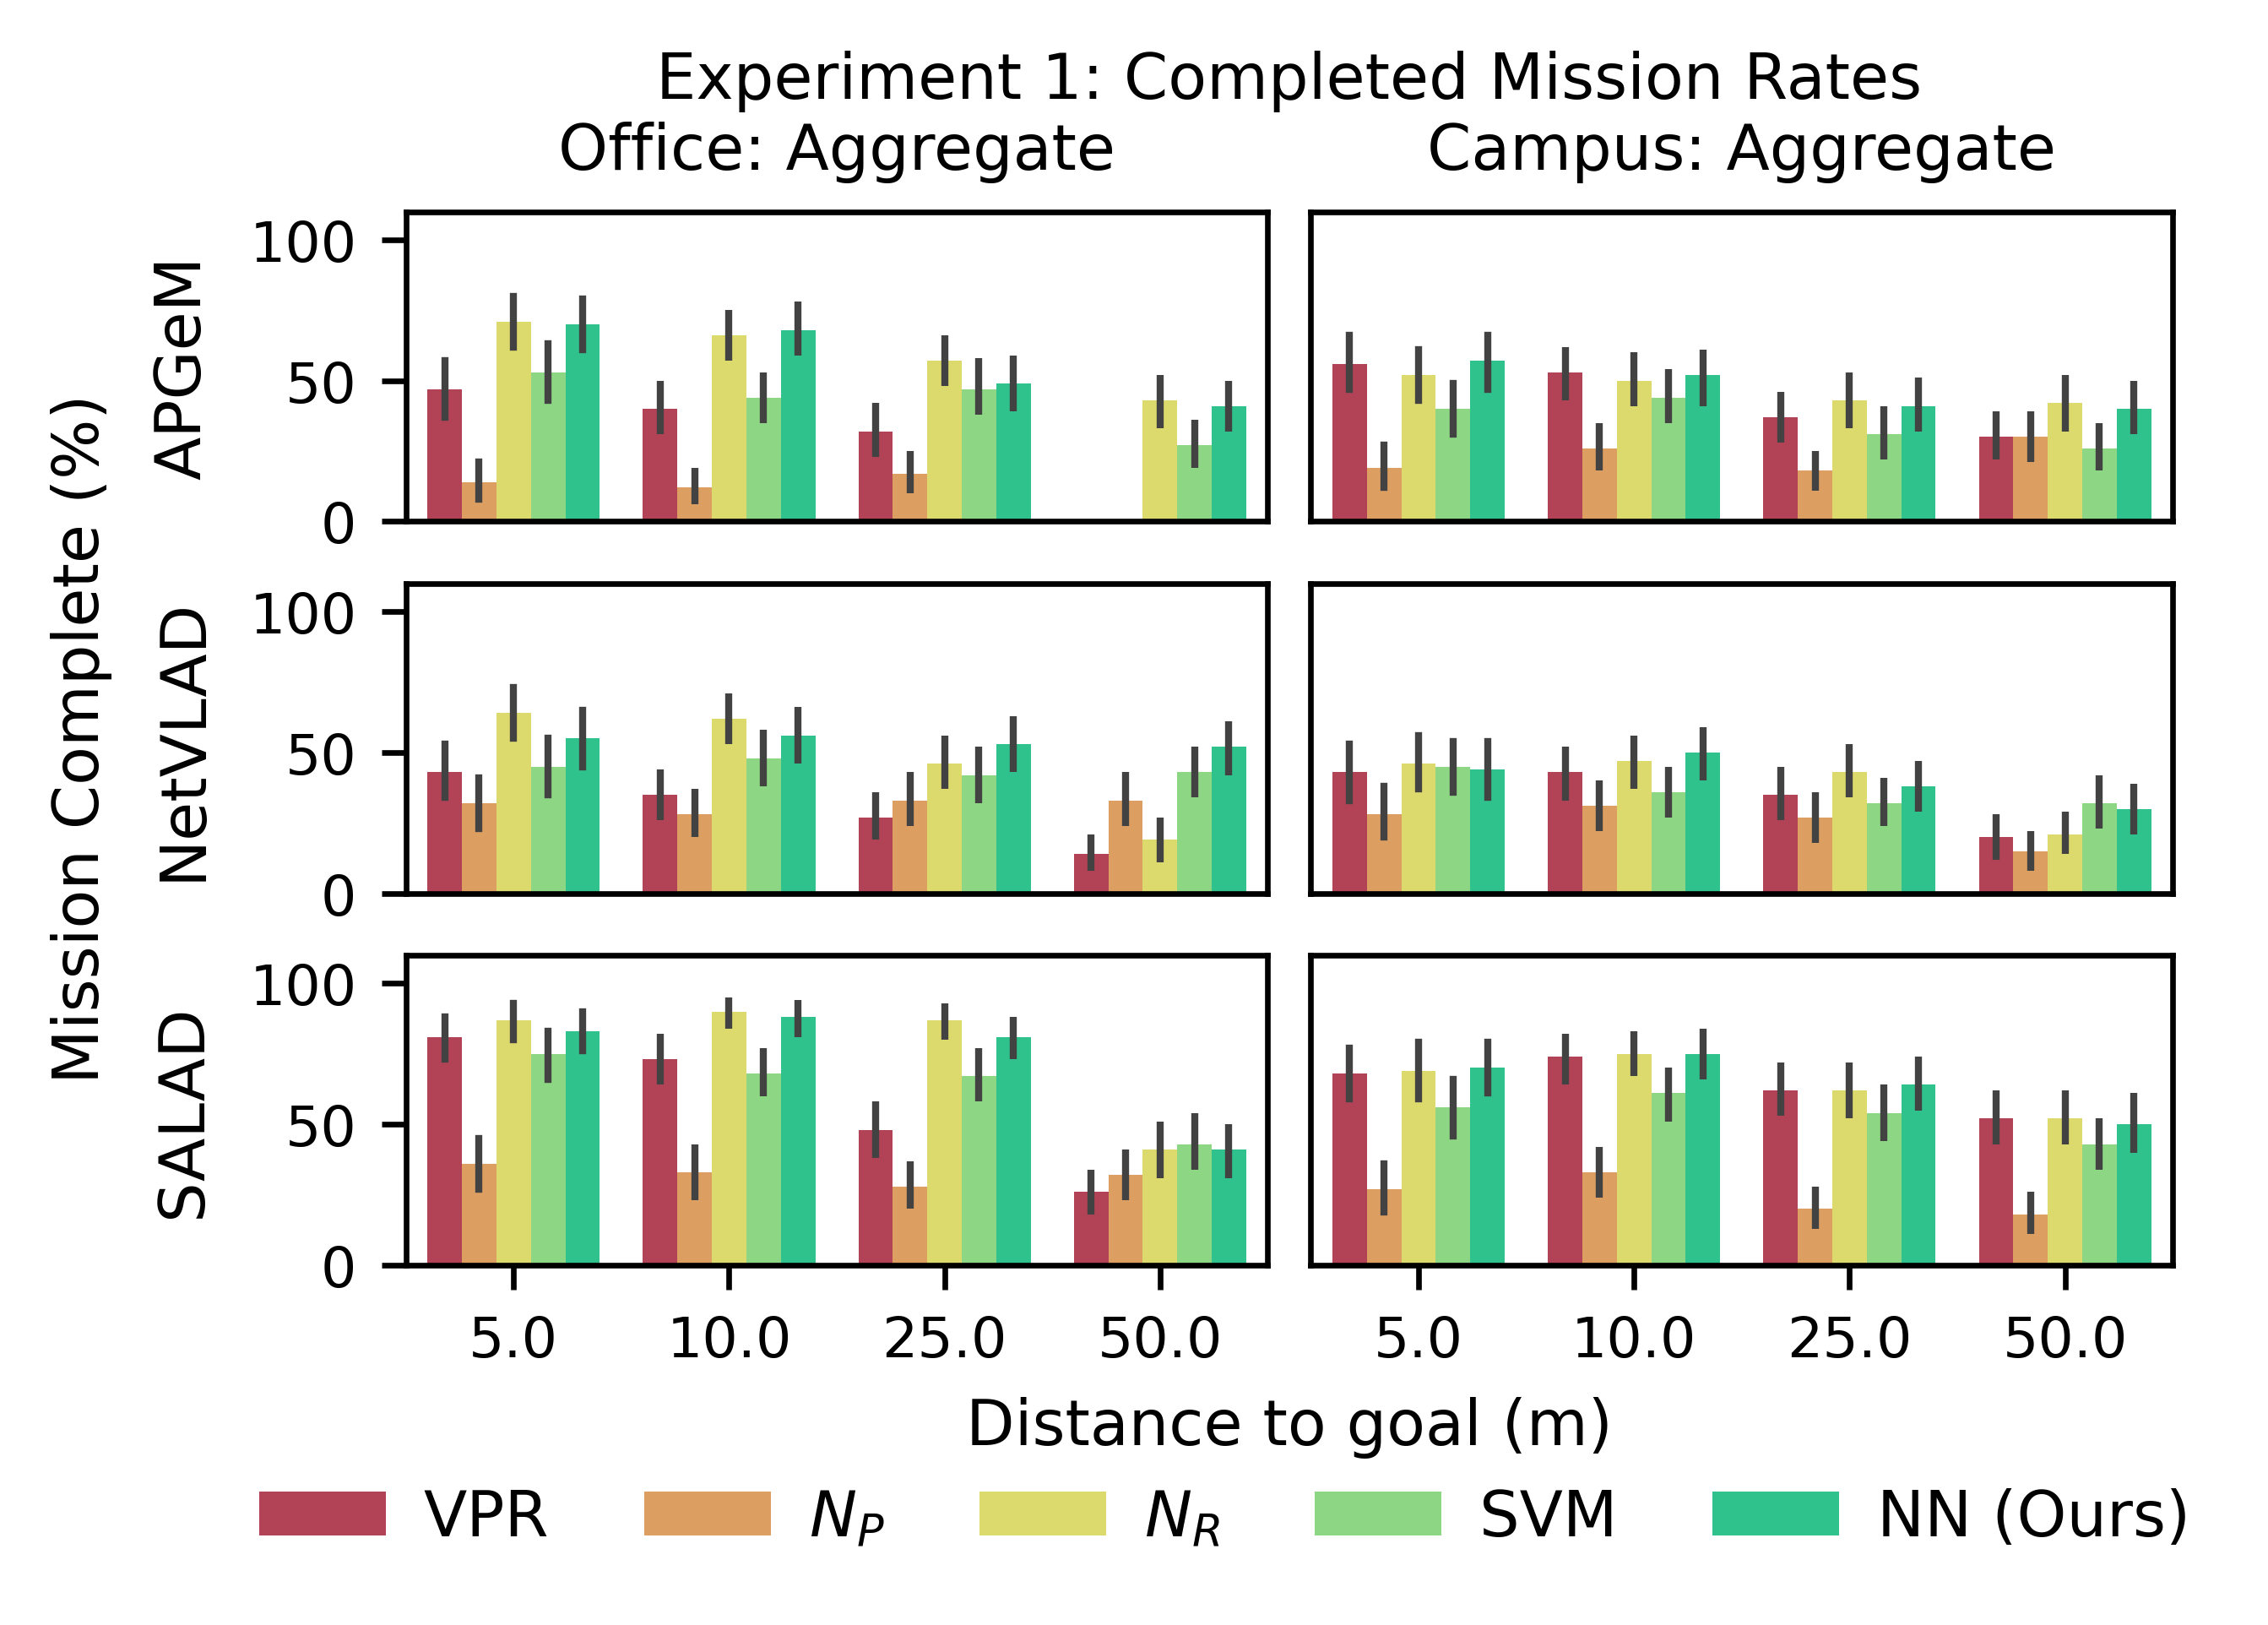

In [4]:
if True: # for code folding :-)
    palette='viridis'

    _s = 4.5/4.0
    err_kws={"linestyle": '-'}
    fig,ax=plt.subplots(3,2,figsize=(4*_s,_s*0.8*3),sharex=True,sharey=True)

    barplotter = lambda _env, _ft_type, _ax: sns.barplot(
        data=df_features[(df_features.environment==_env) & (df_features.vprfeaturetype==_ft_type) & (df_features.mission_impossible==False)],
        x='slice_length',y='mission_complete',hue='filter',palette=GENERAL.PALETTE,ax=_ax,
        hue_order=GENERAL.HUE_ORDER,errorbar=("ci",95), linewidth=0.1, width=0.8)

    f00 = barplotter('Office', 'APGEM',     ax[0][0])
    f01 = barplotter('Office', 'NETVLAD',   ax[1][0])
    f02 = barplotter('Office', 'SALAD',     ax[2][0])

    f10 = barplotter('Campus', 'APGEM',     ax[0][1])
    f11 = barplotter('Campus', 'NETVLAD',   ax[1][1])
    f12 = barplotter('Campus', 'SALAD',     ax[2][1])

    ax[0][0].set_title('Office: Aggregate', fontsize=9)
    ax[0][1].set_title('Campus: Aggregate', fontsize=9)

    ax[0][0].set_ylabel('APGeM',   fontsize=9, labelpad=5)
    ax[1][0].set_ylabel('NetVLAD', fontsize=9, labelpad=5)
    ax[2][0].set_ylabel('SALAD',   fontsize=9, labelpad=5)
    ax[0][1].set_ylabel('')
    ax[1][1].set_ylabel('')
    ax[2][1].set_ylabel('')

    fs = [f00, f10, f01, f11, f02, f12]

    # [i.set(xlabel=None,ylim=(0,1),yticks=[0,0.25,0.5,0.75,1.0],yticklabels=[0,25,50,75,100]) for i in fs]
    [i.set(xlabel=None,ylim=(0,1.1),yticks=[0,0.5,1.0],yticklabels=[0,50,100]) for i in fs]
    [i.tick_params(bottom=False) for i in fs[0:-2]]
    [i.tick_params(left=False) for i in fs[1::2]]
    [i.set_xlabel('') for i in fs]
    [i.tick_params(axis='both', which='both', labelsize=8) for i in fs]
    [i.legend_.remove() for i in fs[:-1]]

    for f in fig.get_children():
        for i in f.get_children():
            if isinstance(i, Line2D):
                i._dash_pattern = (0.0, None)
                i._linewidth = 1
                
    _fontdict={"fontsize":9}
    big_frame = fig.add_subplot(111, frameon=False)
    big_frame.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    big_frame.set_ylabel('Mission Complete (%)',  labelpad=22, fontdict=_fontdict)
    big_frame.set_xlabel('Distance to goal (m)',  labelpad=4, fontdict=_fontdict)
    big_frame.set_title('Experiment 1: Completed Mission Rates\n', fontdict=_fontdict)

    legend1=ax[2][1].legend(loc='lower center', bbox_to_anchor=(-0.1, -1.1),ncols=5, frameon=False,title='', fontsize=9, 
                             labelspacing=0, columnspacing=1.5, handletextpad=0.6)

    fig.subplots_adjust(wspace=0.05)

    fig.canvas.draw()

    path = GENERAL.DIR_MEDIA + '/exp1_new_extended_mission_complete_vertical' #relative to file directory
    fig.savefig(path+'.pdf', format='pdf', bbox_extra_artists=(legend1,), dpi=300, pad_inches=0, bbox_inches='tight')
    fig.savefig(path+'.png', format='png', bbox_extra_artists=(legend1,), dpi=300, pad_inches=0, bbox_inches='tight')


## Tables

In [5]:
if True:
    LATEX_MODE = True
    ONLY_AGGREGATES = True
    UNDERLINE_MODE = False # latex only

    offset = '        '
    if LATEX_MODE:
        _la  = '% 13s'
        _sb  = r'\B{'
        _si  = r'\I{'
        _su  = r'\U{'
        _sn  = r'   '
        _eb  = r'm  }'
        _ei  = r'm  }'
        _en  = r'm   '
        _ebp = r'\% }'
        _eip = r'\% }'
        _enp = r'\%  '
        _ee  = r' \\'
        _sf  = '& % 14s '
        if UNDERLINE_MODE:
            _si = _su
    else:
        _la  = '% 11s'
        _sb  = r''
        _si  = r''
        _sn  = r''
        _eb  = r'm* '
        _ei  = r'm^ '
        _en  = r'm  '
        _ebp = r'%%*'
        _eip = r'%%^'
        _enp = r'%% '
        _ee  = r'   '
        _sf  = '| % 8s '
    print()
    long_featname = np.max([len(i.get_descriptor_name()) for i in DF_GENERAL.DESCRIPTOR_TYPES])
    df_ = df_features

    def make_xfix(_b, _i, _n, c, bests, best_inds, skip_inds):
        '''
        _b -> prefix if bold
        _i -> prefix if italics
        _n -> prefix if normal
        c  -> index of best_inds in question
        '''
        italics_inds = []
        italics_values = []
        bold_inds = []
        bold_values = []
        bold_first = -1
        for p, i in enumerate(best_inds):
            if (i not in skip_inds):
                if (not bold_inds) or (bests[i] in bold_values):
                    bold_inds.append(i)
                    bold_values.append(bests[i])
                    if bold_first == -1:
                        bold_first = p
        for p, i in enumerate(best_inds):
            if (i in skip_inds):
                # if an italics_ind value beats the best bold_value
                if ((not italics_inds) and ((p < bold_first) or (bests[i] in bold_values))) \
                    or (bests[i] in italics_values):
                    italics_inds.append(i)
                    italics_values.append(bests[i])
        return _b if c in bold_inds else (_i if c in italics_inds else (_n))

    def table_start():
        print(r'    \centering')
        print(r'    \scriptsize')
        print(r'    \setlength\tabcolsep{1.2mm}')
        print(r'    \begin{tabular}{lcL{11mm}|M{9mm}|M{9mm}M{9mm}|M{9mm}M{9mm}|}')

    def table_end(table_label: str):
        print(r'    \end{tabular}')
        print(r'    \label{table:' + table_label + r'}')
        print(r'    \vspace*{-\baselineskip}')

    if LATEX_MODE:
        print(r'\begin{table}[!ht]')
        print(r'    \caption{Experiment 1 along-track goal error and percentage missions '
              r'complete (M.C.). Best '
              r'performance for each feature type is indicated by bold, ignoring naive '
              r'thresholds. Naive thresholds are italicized if best performance.}')
        table_start()

    thresh_inds = [GENERAL.PRED_TYPES.index('nvp'), GENERAL.PRED_TYPES.index('nvr')]
    for feat in DF_GENERAL.DESCRIPTOR_TYPES:
        if LATEX_MODE:
            if feat != DF_GENERAL.DESCRIPTOR_TYPES[0]:
                if not ONLY_AGGREGATES:
                    print(offset + r'\hline')
            else:
                if not ONLY_AGGREGATES:
                    print(offset + r'\cline{3-7}')
                else:
                    print(offset + r'\cline{4-8}')
            if not ONLY_AGGREGATES:
                print(offset + r'& & \multicolumn{5}{c|}{\B{' + feat.get_descriptor_name() \
                        + r' Features}} \\')
            if feat == DF_GENERAL.DESCRIPTOR_TYPES[0]:
                sep = r' & ' if not ONLY_AGGREGATES else r' & & '
                print(offset + r'&' + sep 
                    + r'\B{Baseline} & \multicolumn{4}{c|}{\B{Filtering Technique}} \\')
                print(offset + r'&' + sep 
                    + r'\B{VPR}      & \boldmath{$N_P$} & '
                        r'\boldmath{$N_R$} & \B{SVM} & \B{Ours} \\')
            print(offset + r'\hline')
        else:
            print('\n' + feat.get_descriptor_name())
        for env, cond in product(['Office', 'Campus', 'Aggregate'], ['Normal', 'Adverse']):
            if (env == 'Aggregate'): 
                if (cond == 'Adverse'): break
                else: set_name = env
            else:
                if ONLY_AGGREGATES: continue
                set_name = env + '\n' + cond
            
            if not (set_name == 'Aggregate'):
                df__ = df_[(df_['set'] == set_name) & (df_['vprfeaturetype']==feat.name)]
            else:
                df__ = df_[(df_['vprfeaturetype']==feat.name)]

            stats = {}
            for label in GENERAL.PRED_TYPES:
                stats[label] = {k: np.nan for k in ['gf', 'mc', 'mean', 'med', 'max']}
                data = df__[df__['filter'] == GENERAL.MODE_NAMES[label]]
                try:
                    stats[label]['gf'] = 100 * data[data.goal_found==True].shape[0] / len(data)
                    stats[label]['mean'] = np.nanmean(data.abs_overshoot[data.goal_found==True])
                    stats[label]['med'] = np.nanmedian(data.abs_overshoot[data.goal_found==True])
                    stats[label]['max'] = np.nanmax(data.abs_overshoot[data.goal_found==True])
                except (ValueError, ZeroDivisionError):
                    pass
                try:
                    stats[label]['mc'] = 100 * data[data.mission_complete==True].shape[0] \
                                            / len(data)
                except (ValueError, ZeroDivisionError):
                    pass

            num_labels = len(stats.keys())
            means = np.round(np.array([stats[label]['mean'] for label in stats.keys()]),2)
            means_best = np.argsort(means)
            means_str = ''.join([_sf % (make_xfix(_sb, _si, _sn, i, means, means_best, thresh_inds) 
                                + ('%6.2f' % means[i])
                                + make_xfix(_eb, _ei, _en, i, means, means_best, thresh_inds))
                                        for i in range(num_labels)])

            medis = np.round(np.array([stats[label]['med'] for label in stats.keys()]),2)
            medis_best = np.argsort(medis)
            medis_str = ''.join([_sf % (make_xfix(_sb, _si, _sn, i, medis, medis_best, thresh_inds) 
                                + ('%6.2f' % medis[i])
                                + make_xfix(_eb, _ei, _en, i, medis, medis_best, thresh_inds))
                                        for i in range(num_labels)])

            max_s = np.round(np.array([stats[label]['max'] for label in stats.keys()]),2)
            max_s_best = np.argsort(max_s)
            max_s_str = ''.join([_sf % (make_xfix(_sb, _si, _sn, i, max_s, max_s_best, thresh_inds) 
                                + ('%6.2f' % max_s[i])
                                + make_xfix(_eb, _ei, _en, i, max_s, max_s_best, thresh_inds))
                                        for i in range(num_labels)])

            gf__s = np.round(np.array([stats[label]['gf'] for label in stats.keys()]),2)
            gf__s_best = np.argsort(gf__s)[::-1]
            gf__s_str = ''.join([_sf % (make_xfix(_sb, _si, _sn, i, gf__s, gf__s_best, thresh_inds) 
                                + ('%6.2f' % gf__s[i])
                                + make_xfix(_ebp, _eip, _enp, i, gf__s, gf__s_best, thresh_inds))
                                        for i in range(num_labels)])
            
            mc__s = np.round(np.array([stats[label]['mc'] for label in stats.keys()]),2)
            mc__s_best = np.argsort(mc__s)[::-1]
            mc__s_str = ''.join([_sf % (make_xfix(_sb, _si, _sn, i, mc__s, mc__s_best, thresh_inds) 
                                + ('%6.2f' % mc__s[i])
                                + make_xfix(_ebp, _eip, _enp, i, mc__s, mc__s_best, thresh_inds))
                                        for i in range(num_labels)])


            _set_name = set_name.replace('\n',' ')
            if not LATEX_MODE:
                print(_set_name)
                print((' '*7) + ''.join([_la % i 
                                            for i in ['VPR', 'NVP', 'NVR', 'SVM', 'NN']]))
            if LATEX_MODE:
                if not ONLY_AGGREGATES:
                    _first_whole = r'\ocMCSMR{1}{|c|}{4}{' + _set_name + r'}' \
                            + (' '*5 if env == 'Aggregate' else \
                                    (' ' if cond == 'Normal' else ''))
                    _other = r'\ocblb'
                    _other_whole = _other + (' ' * (len(_first_whole) - len(_other)))
                else:
                    featname_diff = long_featname - len(feat.get_descriptor_name())
                    _first_whole = r'\ocMCSMRT{2}{|c|}{4}{' + feat.get_descriptor_name() \
                                        + r' Aggregate}' + (' ' * featname_diff)
                    _other = r'\ocblbT'
                    _other_whole = _other + (' ' * (len(_first_whole) - len(_other)))
                print(offset + _first_whole + ' &      M.C. ' + mc__s_str + _ee)
                print(offset + _other_whole + ' &      Mean ' + means_str + _ee)
                print(offset + _other_whole + ' &    Median ' + medis_str + _ee)
                print(offset + _other_whole + ' &   Maximum ' + max_s_str + _ee)
                if env != 'Aggregate':
                    print(offset + '\hline')
            else:
                print('Missions Complete: ' + mc__s_str)
                print('             Mean: ' + means_str)
                print('           Median: ' + medis_str)
                print('          Maximum: ' + max_s_str)
    if LATEX_MODE:
        print(offset + '\hline')
        table_end("exp1_summary_new")
        print(r'\end{table}')


\begin{table}[!ht]
    \caption{Experiment 1 along-track goal error and percentage missions complete (M.C.). Best performance for each feature type is indicated by bold, ignoring naive thresholds. Naive thresholds are italicized if best performance.}
    \centering
    \scriptsize
    \setlength\tabcolsep{1.2mm}
    \begin{tabular}{lcL{11mm}|M{9mm}|M{9mm}M{9mm}|M{9mm}M{9mm}|}
        \cline{4-8}
        & & & \B{Baseline} & \multicolumn{4}{c|}{\B{Filtering Technique}} \\
        & & & \B{VPR}      & \boldmath{$N_P$} & \boldmath{$N_R$} & \B{SVM} & \B{Ours} \\
        \hline
        \ocMCSMRT{2}{|c|}{4}{AP-GeM Aggregate}  &      M.C. &      36.88\%   &      17.00\%   &  \I{ 53.00\% } &      39.00\%   &  \B{ 52.25\% }  \\
        \ocblbT                                 &      Mean &      12.95m    &       6.38m    &       4.00m    &       6.74m    &  \B{  3.32m  }  \\
        \ocblbT                                 &    Median &       4.30m    &       1.58m    &       0.45m    &       0.

# Aggregate-Aggregate Summary Table

In [6]:
# Aggregate-aggregate data:
data = df_features[df_features['filter'] == GENERAL.MODE_NAMES['vpr']]
vpr_aggregate_gf = 100 * data[data.goal_found==True].shape[0] / len(data)
vpr_aggregate_mc = 100 * data[data.mission_complete==True].shape[0] / len(data)
vpr_aggregate_mean = np.nanmean(data.abs_overshoot[data.goal_found==True])
vpr_aggregate_med = np.nanmedian(data.abs_overshoot[data.goal_found==True])
vpr_aggregate_max = np.nanmax(data.abs_overshoot[data.goal_found==True])

data = df_features[df_features['filter'] == GENERAL.MODE_NAMES['svm']]
svm_aggregate_gf = 100 * data[data.goal_found==True].shape[0] / len(data)
svm_aggregate_mc = 100 * data[data.mission_complete==True].shape[0] / len(data)
svm_aggregate_mean = np.nanmean(data.abs_overshoot[data.goal_found==True])
svm_aggregate_med = np.nanmedian(data.abs_overshoot[data.goal_found==True])
svm_aggregate_max = np.nanmax(data.abs_overshoot[data.goal_found==True])

data = df_features[df_features['filter'] == GENERAL.MODE_NAMES['prd']]
nn_aggregate_gf = 100 * data[data.goal_found==True].shape[0] / len(data)
nn_aggregate_mc = 100 * data[data.mission_complete==True].shape[0] / len(data)
nn_aggregate_mean = np.nanmean(data.abs_overshoot[data.goal_found==True])
nn_aggregate_med = np.nanmedian(data.abs_overshoot[data.goal_found==True])
nn_aggregate_max = np.nanmax(data.abs_overshoot[data.goal_found==True])

print()
print(f'      Experiment 1 Aggregate Statistics Improvement from Baseline VPR')
print(f'           ----------------------------------------------------')
print(f'                          VPR   :   SVM   :    NN')
print(f'           ----------------------------------------------------')
print(f'            goal found: {  vpr_aggregate_gf:6.2f}% : {  svm_aggregate_gf:6.2f}% : {  nn_aggregate_gf:6.2f}%')
print(f'     missions complete: {  vpr_aggregate_mc:6.2f}% : {  svm_aggregate_mc:6.2f}% : {  nn_aggregate_mc:6.2f}%')
print(f'                  mean: {vpr_aggregate_mean:6.2f}m : {svm_aggregate_mean:6.2f}m : {nn_aggregate_mean:6.2f}m')
print(f'                median: { vpr_aggregate_med:6.2f}m : { svm_aggregate_med:6.2f}m : { nn_aggregate_med:6.2f}m')
print(f'               maximum: { vpr_aggregate_max:6.2f}m : { svm_aggregate_max:6.2f}m : { nn_aggregate_max:6.2f}m')


      Experiment 1 Aggregate Statistics Improvement from Baseline VPR
           ----------------------------------------------------
                          VPR   :   SVM   :    NN
           ----------------------------------------------------
            goal found: 100.00% : 100.00% :  99.83%
     missions complete:  43.29% :  45.92% :  56.17%
                  mean:  10.19m :   5.59m :   3.21m
                median:   0.82m :   0.58m :   0.41m
               maximum:  50.04m :  50.03m :  50.03m
